In [ ]:
# Start writing code here...
import pandas as pd
import math


features_df = pd.read_csv('data.csv', index_col=0)
labels = pd.read_csv('labels.csv')

In [ ]:
print(len(features_df.values.tolist())) 
print(len(features_df.dropna().values.tolist()))

801
801


267
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexes/base.py:4308: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


(array([3864., 1593., 1579., 1821., 2823., 4562., 3304.,  820.,  145.,
          20.]),
 array([ 0.        ,  1.64304416,  3.28608833,  4.92913249,  6.57217666,
         8.21522082,  9.85826499, 11.50130915, 13.14435331, 14.78739748,
        16.43044164]),
 <BarContainer object of 10 artists>)

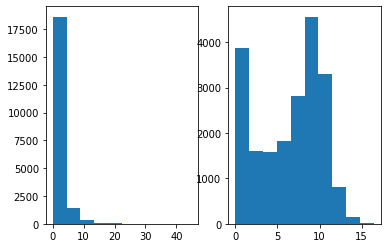

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
variances = features_df.var().values.tolist()
means = features_df.mean().values.tolist()

checkTrue = features_df.var() == 0
constantFeatures = [i for i, val in enumerate(checkTrue) if val]
print(len(constantFeatures))
features = features_df.drop(features_df.columns[[constantFeatures]], axis=1)
#features=(features_df-features_df.mean())/features_df.std()


plt.subplot(121)

plt.hist(variances)
plt.subplot(122)
plt.hist(means)



20264
0.028706734882155614
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexes/base.py:4308: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


(array([259., 532., 543., 542., 556., 779., 914., 649., 193.,  33.]),
 array([0.06617194, 0.1328007 , 0.19942946, 0.26605821, 0.33268697,
        0.39931572, 0.46594448, 0.53257323, 0.59920199, 0.66583075,
        0.7324595 ]),
 <BarContainer object of 10 artists>)

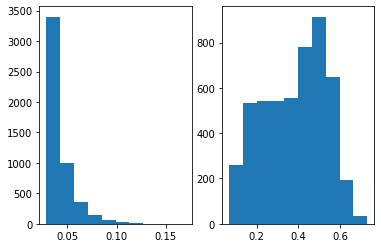

In [ ]:
from sklearn.feature_selection import VarianceThreshold

nFeatures = np.sort(features.var()).shape[0]
print(nFeatures)
features=(features-features.min())/(features.max()-features.min())
threshold = np.sort(features.var())[nFeatures-5000]
print(threshold)
checkTrue = features.var() < threshold
toRemove = [i for i, val in enumerate(checkTrue) if val]
features = features.drop(features.columns[[toRemove]], axis=1)

variances = features.var().values.tolist()
means = features.mean().values.tolist()

plt.subplot(121)
plt.hist(variances)
plt.subplot(122)
plt.hist(means)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(features)
features = scaler.transform(features)
print(np.round(features.var(), 5))
print(np.round(features.mean(), 5))
print(features)


1.0
0.0
[[-0.82802988  0.15980044  1.22157468 ... -0.68704729  0.99624675
  -0.11648251]
 [-2.01501735 -1.415042   -0.3765177  ... -1.6652405   0.59164923
  -1.65688871]
 [ 0.41734754  1.15673547  0.11283193 ...  0.63056745  0.23260122
  -1.85526414]
 ...
 [ 0.19888076  0.57481583 -0.61145218 ...  0.12695103 -0.52828091
  -0.41046699]
 [-0.35045311 -0.28863152  0.34278305 ...  1.09304644 -0.04276727
   0.09195083]
 [-0.57135218  0.66725377 -0.50026526 ...  1.28783773  1.8023096
  -0.47161901]]


In [ ]:
#https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py

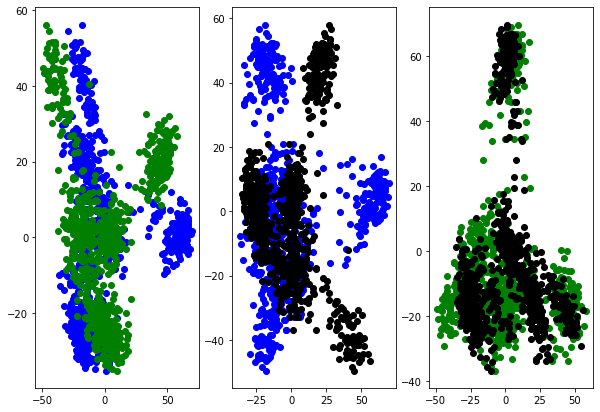

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=801)
components = pca.fit_transform(features)
#print(components[0])
fig = plt.figure(figsize = (10,7) )
plt.subplot(131)
plt.scatter(components[:, 0], components[:, 2], c='blue')
plt.scatter(components[:, 1], components[:, 2], c='green')

plt.subplot(132)
plt.scatter(components[:, 0], components[:, 1], c='blue')
plt.scatter(components[:, 2], components[:, 1], c='black')

plt.subplot(133)
plt.scatter(components[:, 1], components[:, 0], c='green')
plt.scatter(components[:, 2], components[:, 0], c='black')


(5000, 801)
(801, 801)


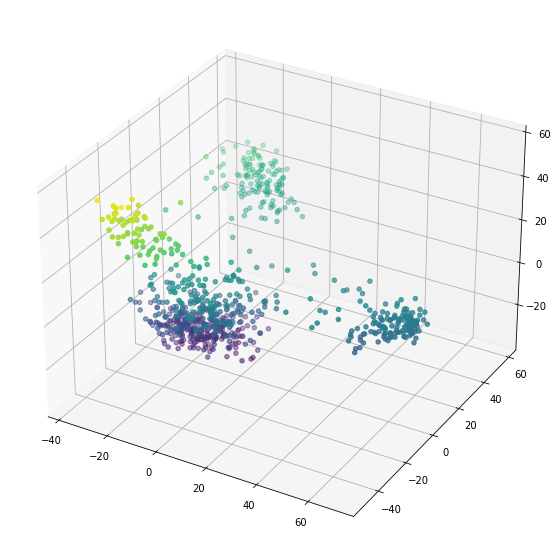

In [ ]:


pca = PCA(n_components=801)
print(features.T.shape)
#components = pca.fit(features.T).components_
components = pca.fit_transform(features)
print(components.shape)


fig = plt.figure(figsize = (10,10) )
ax = plt.axes(projection='3d')
x = components[:, 0]
y = components[:, 1]
z = components[:, 2]
ax.scatter3D(x, y, z, c=z);





(array([-5.03443223e+01+67.70847307j, -5.03443223e+01-67.70847307j,
        6.08192971e+01+32.76267189j,  6.08192971e+01-32.76267189j,
        6.53642677e+01 +0.j        , -3.28283010e+01+53.25380174j,
       -3.28283010e+01-53.25380174j,  9.24691212e+00+61.44730703j,
        9.24691212e+00-61.44730703j,  4.50388900e+01+39.13784367j,
        4.50388900e+01-39.13784367j, -5.90219115e+01 +5.85828313j,
       -5.90219115e+01 -5.85828313j, -5.36379788e+01+21.25777868j,
       -5.36379788e+01-21.25777868j,  2.32249570e+01+52.4229856j ,
        2.32249570e+01-52.4229856j , -5.51482196e+01+13.06542593j,
       -5.51482196e+01-13.06542593j, -3.65310395e+01+40.57303285j,
       -3.65310395e+01-40.57303285j, -4.30160682e+01+33.32048423j,
       -4.30160682e+01-33.32048423j,  1.01785145e+01+52.80877308j,
        1.01785145e+01-52.80877308j, -3.45711802e+00+53.7692384j ,
       -3.45711802e+00-53.7692384j ,  4.70605165e+01+24.26718802j,
        4.70605165e+01-24.26718802j,  4.23858696e+01+31.24160

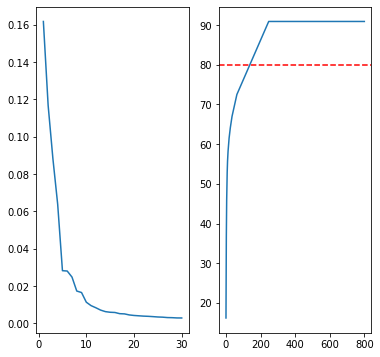

In [ ]:
from numpy.linalg import eig

eigenvalues = eig(components)
print(eigenvalues)

expl = pca.explained_variance_ratio_
fig = plt.figure(figsize = (6,6) )
plt.subplot(121)
plt.plot(np.arange(30)+1, expl[:30], '-')
plt.subplot(122)
variance = np.cumsum(np.round(expl, decimals=3)*100)
nComponents = np.where(variance >= 80)[0][0]
print(f"Number of components that represent 80% of variance:{nComponents}")
plt.axhline(y=80, color = 'r', linestyle = '--')
plt.plot(variance)

reducedPCA = PCA(n_components=nComponents)
components = reducedPCA.fit_transform(features)



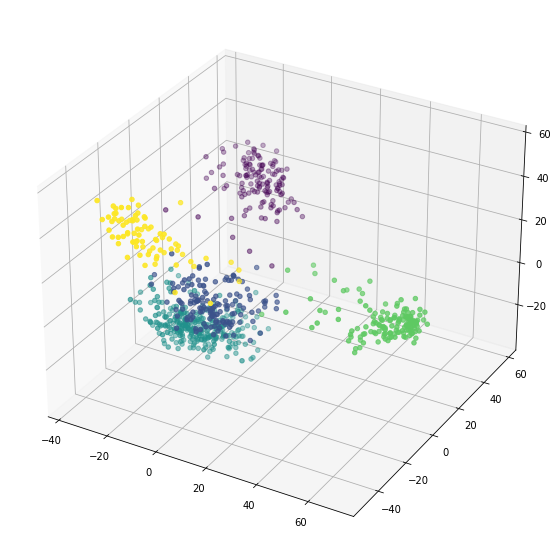

In [ ]:
newlabels = np.array(labels.drop(axis=1, columns= 'Unnamed: 0'))
namelist = ['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']
for i in range (len(namelist)):
    newlabels[newlabels == namelist[i]] = i
newlabels = newlabels[:,0]
fig = plt.figure(figsize = (10,10) )
ax = plt.axes(projection='3d')
x = components[:, 0]
y = components[:, 1]
z = components[:, 2]
ax.scatter3D(x, y, z, c=newlabels);

### K-Means

Silhouette score: 0.282872300487767
Homogeneity score: 0.9613533128006769
V-score: 0.9623581691004004


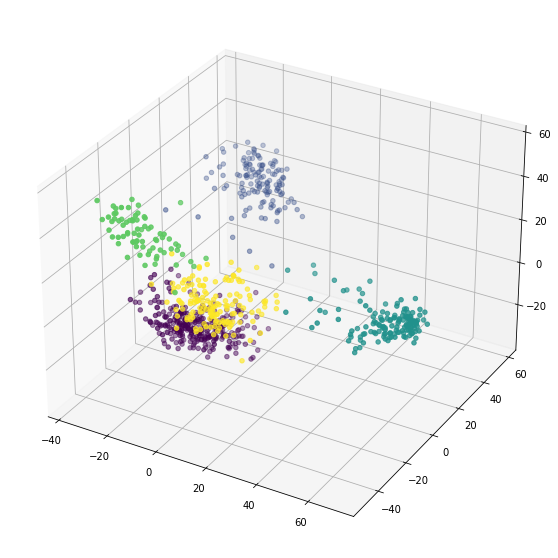

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import homogeneity_score, v_measure_score

clusters = 5
predictions = KMeans(n_clusters=clusters).fit_predict(components, y=newlabels)
fig = plt.figure(figsize = (10,10) )
ax = plt.axes(projection='3d')
x = components[:, 0]
y = components[:, 1]
z = components[:, 2]
ax.scatter3D(x, y, z, c=predictions);

print(f"Silhouette score: {metrics.silhouette_score(components, predictions, metric='euclidean')}")
print(f"Homogeneity score: {homogeneity_score(newlabels, predictions)}")
print(f"V-score: {metrics.v_measure_score(newlabels, predictions)}")

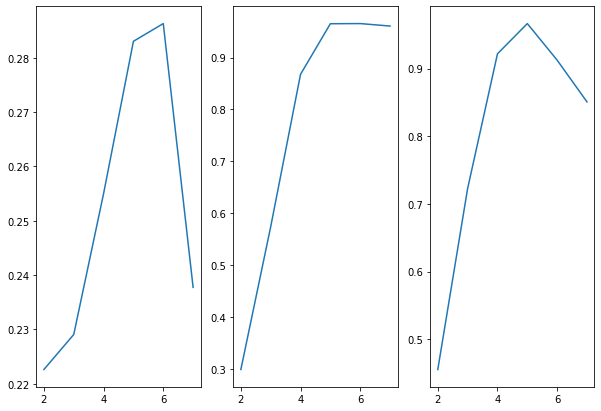

In [ ]:
clusters = [2,3,4,5,6,7]
sil = []
hom = []
v = []
for k in clusters:
    predictions = KMeans(n_clusters=k).fit_predict(components, y=newlabels)
    sil.append(metrics.silhouette_score(components, predictions, metric='euclidean'))
    hom.append(homogeneity_score(newlabels, predictions))
    v.append(metrics.v_measure_score(newlabels, predictions))
    #print(f"Number of clusters: {k}")
    #print(f"Silhouette score: {metrics.silhouette_score(components, predictions, metric='euclidean')}")
    #print(f"Homogeneity score: {homogeneity_score(newlabels, predictions)}")
    #print(f"V-score: {metrics.v_measure_score(newlabels, predictions)}")
fig = plt.figure(figsize = (10,7))
plt.subplot(131)
plt.plot(clusters, sil)
plt.subplot(132)
plt.plot(clusters, hom)
plt.subplot(133)
plt.plot(clusters, v)

# Badabim badabom xXmr Sp3ctR4LBoiXx1337

In [ ]:

from sklearn.cluster import SpectralClustering
from sklearn import metrics

"""
clusters = 5
predictions = SpectralClustering(n_clusters=clusters, n_init=100, assign_labels = 'discretize').fit_predict(components, y=newlabels)
#print(predictions)
fig = plt.figure(figsize = (10,10) )
ax = plt.axes(projection='3d')
x = components[:, 0]
y = components[:, 1]
ax.scatter3D(x, y, z, c=predictions);

print(f"Silhouette score: {metrics.silhouette_score(components, predictions)}")
print(f"Homogeneity score: {homogeneity_score(newlabels, predictions)}")
print(f"V-score: {metrics.v_measure_score(newlabels, predictions)}")
"""

clusters = [2,3,4,5,6,7]
sil = []
hom = []
v = []
for k in clusters:
    predictions = SpectralClustering(n_clusters=k, n_init=100, assign_labels = 'discretize').fit_predict(components, y=newlabels)
    sil.append(metrics.silhouette_score(components, predictions, metric='euclidean'))
    hom.append(homogeneity_score(newlabels, predictions))
    v.append(metrics.v_measure_score(newlabels, predictions))
    #print(f"Number of clusters: {k}")
    #print(f"Silhouette score: {metrics.silhouette_score(components, predictions, metric='euclidean')}")
    #print(f"Homogeneity score: {homogeneity_score(newlabels, predictions)}")
    #print(f"V-score: {metrics.v_measure_score(newlabels, predictions)}")
fig = plt.figure(figsize = (10,7))
plt.subplot(131)
plt.plot(clusters, sil)
plt.subplot(132)
plt.plot(clusters, hom)
plt.subplot(133)
plt.plot(clusters, v)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:100: RuntimeWarning: invalid value encountered in true_divide
  vectors = vectors / np.sqrt((vectors ** 2).sum(axis=1))[:, np.newaxis]
SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
SVD di

LinAlgError: SVD did not converge

### Task 5

In [ ]:
def createSubsamples(data, M, K, frac=0.8):
    indecies = list(range(data.shape[0]))

    subSamples = []
    for i in range(M):
        subSamples.append(np.random.choice(indecies, size=int(len(indecies)*frac), replace=False))
    return np.array(subSamples)

subSamples = createSubsamples(components, 100, 1)


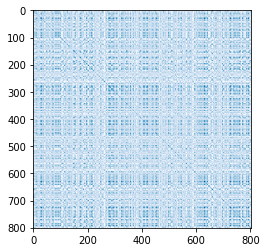

In [ ]:
def createConsensusMatrix(data,subSamples,K):
    connectivityMatrix = np.zeros(shape=(data.shape[0], data.shape[0]))
    indicatorMatrix = np.zeros(shape=(data.shape[0], data.shape[0]))
    for subSample in subSamples:
        predictions = (KMeans(n_clusters=K).fit_predict(data[subSample]))
        for i in range(len(predictions)):
            for j in range(len(predictions)): #set diagonal to zero?
                if predictions[i] == predictions[j]:
                    connectivityMatrix[subSample[i],subSample[j]] += 1
    
    
        for n in range(subSample.shape[0]):
            for m in range(subSample.shape[0]):
                i = subSample[n]
                j = subSample[m]
                indicatorMatrix[i,j] += 1
    return connectivityMatrix/indicatorMatrix

C = createConsensusMatrix(components,subSamples,5)
plt.imshow(C, cmap='Blues',interpolation="spline16")


In [ ]:
!pip install statsmodels==0.13.2

     |████████████████████████████████| 9.8 MB 28.9 MB/s 
     |████████████████████████████████| 233 kB 60.3 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install statsmodels==0.13.2

     |████████████████████████████████| 9.8 MB 32.4 MB/s 
     |████████████████████████████████| 233 kB 59.3 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


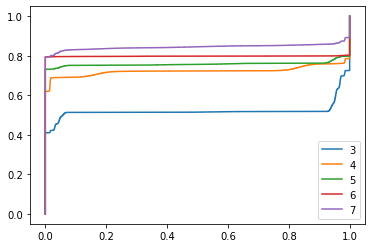

In [ ]:

from statsmodels.distributions.empirical_distribution import ECDF
nClusters = [3,4,5,6,7]
legends = [f"clusters = {c}" for c in nClusters]
PAC_y = []
PAC_x = []
for k in nClusters:
    C = createConsensusMatrix(components,subSamples,k)
    flatten_C = C.flatten()
    ecdf = ECDF(flatten_C)
    plt.plot(list(range(len(edcf.y))), ecdf.y)
    PAC.append(ecdf.y[int(len(ecdf.y)*0.9)] - ecdf.y[int(len(ecdf.y)*0.1)])
    PAC_y.append(ecdf.y)
    PAC_x.append(ecdf.x)



plt.legend(["3","4","5","6","7"], loc ="lower right")
plt.show()

In [ ]:
PAC_score = []
for i in range(5):
    matrix = PAC_x[i]
    round_off_values = np.round_(matrix, decimals = 2)
    start = np.where(round_off_values == 0.01)[0][0]
    end = np.where(round_off_values == 0.99)[0][0]
    PAC_score.append(PAC_y[i][end] - PAC_y[i][start])
print(PAC_score)




[0.31126821809816374, 0.15757768457343424, 0.0659257077217773, 0.00818888997990963, 0.09450733399729738]


### Theme B: DBSCAN

DBSCAN stands for density-based spatial clustering of applications with noise


In [ ]:
import collections
from sklearn.cluster import DBSCAN
epsilons = [10,20,30,40,45,50,55, 60,70,80,90,100,200,400,600]
min_samples_sizes = [1,5,10,15,25,50,80]
results = []
for eps in epsilons:
    for min_samples in min_samples_sizes:
        dbscan = DBSCAN(eps=eps, min_samples = min_samples)
        dbscan.fit(components)
        counts = collections.Counter(dbscan.labels_)
        num_noise = counts[-1]
        num_classes = len(counts.keys()) - 1 if num_noise > 0 else 0
        results.append([eps, min_samples, num_noise, num_classes])
    
results = np.array(results)
for result in results:
    if result[3] > 1:
        print(f"num_classes: {result[3]} , eps: {result[0]} , num_samples: {result[1]} , noise {round(100*result[2]/len(dbscan.labels_),2)}%")




num_classes: 3 , eps: 45 , num_samples: 5 , noise 89.26%
num_classes: 3 , eps: 50 , num_samples: 5 , noise 75.91%
num_classes: 3 , eps: 50 , num_samples: 10 , noise 77.9%
num_classes: 3 , eps: 50 , num_samples: 15 , noise 79.4%
num_classes: 3 , eps: 50 , num_samples: 25 , noise 81.52%
num_classes: 3 , eps: 55 , num_samples: 5 , noise 66.17%
num_classes: 3 , eps: 55 , num_samples: 10 , noise 66.92%
num_classes: 3 , eps: 55 , num_samples: 15 , noise 68.04%
num_classes: 3 , eps: 55 , num_samples: 25 , noise 68.79%
num_classes: 2 , eps: 55 , num_samples: 50 , noise 81.15%
num_classes: 3 , eps: 60 , num_samples: 5 , noise 60.3%
num_classes: 3 , eps: 60 , num_samples: 10 , noise 60.42%
num_classes: 3 , eps: 60 , num_samples: 15 , noise 60.42%
num_classes: 3 , eps: 60 , num_samples: 25 , noise 60.67%
num_classes: 3 , eps: 60 , num_samples: 50 , noise 62.05%
num_classes: 6 , eps: 70 , num_samples: 5 , noise 27.84%
num_classes: 6 , eps: 70 , num_samples: 10 , noise 36.45%
num_classes: 6 , eps: 

Accuracy: 17.23
Homogeneity score: 0.7675790452499729
V-score: 0.7729015346693242


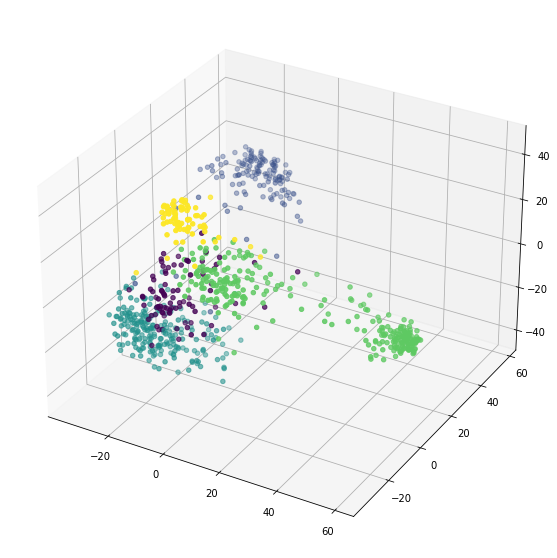

In [ ]:
# https://scikit-learn.org/stable/modules/clustering.html#dbscan

import collections
eps = 50
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples = min_samples)
dbscan.fit(components)
predictions = dbscan.fit_predict(components)

print(f"Accuracy: {round(collections.Counter(predictions == newlabels)[1]*100/len(newlabels),2)}")
#print(f"Silhouette score: {metrics.silhouette_score(components, predictions, metric='euclidean')}")
print(f"Homogeneity score: {homogeneity_score(newlabels, predictions)}")
print(f"V-score: {metrics.v_measure_score(newlabels, predictions)}")
fig = plt.figure(figsize = (10,10) )
ax = plt.axes(projection='3d')
x = components[:, 0]
y = components[:, 1]
z = components[:, 2]
ax.scatter3D(x, y, z, c=predictions);




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f98e27f7-6444-4cf3-8fec-73bc47540f9b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>